<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File data found...reading GOOG data


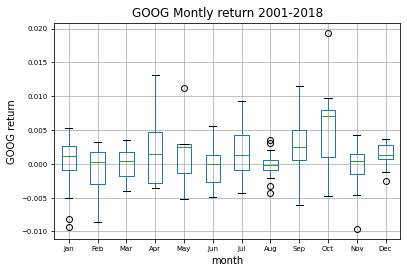

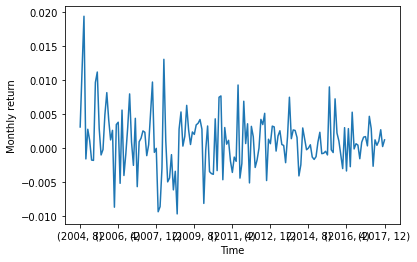

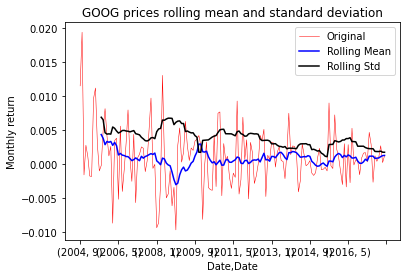

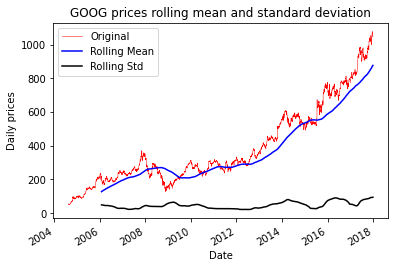

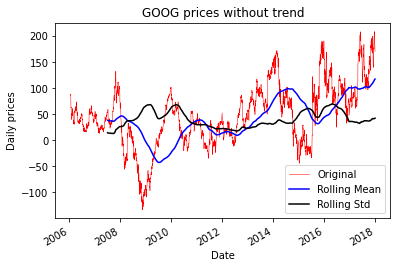

Results of Dickey-Fuller Test:
Test Statistic                -1.284832e+01
p-value                        5.420176e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.580000e+02
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    1.237205
p-value                           0.996233
#Lags Used                       29.000000
Number of Observations Used    3335.000000
dtype: float64


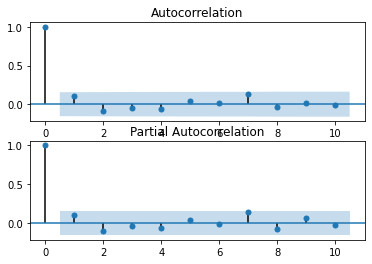

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


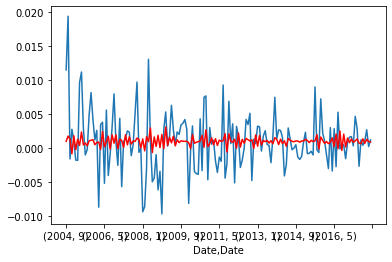

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas_datareader import data
start_date = '2001-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data_large.pkl'

try:
    goog_data = pd.read_pickle(SRC_DATA_FILENAME)
    print('File data found...reading GOOG data')
except FileNotFoundError:
    print('File not found...downloading the GOOG data')
    goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data.to_pickle(SRC_DATA_FILENAME)


goog_monthly_return = goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.year,
     goog_data['Adj Close'].index.month]).mean()

goog_montly_return_list=[]
for i in range(len(goog_monthly_return)):
    goog_montly_return_list.append\
        ({'month':goog_monthly_return.index[i][1],
          'monthly_return': goog_monthly_return[i]})

goog_montly_return_list=pd.DataFrame(goog_montly_return_list,
                                     columns=('month','monthly_return'))

goog_montly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('GOOG return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("GOOG Montly return 2001-2018")
plt.suptitle("")
plt.show()


fig = plt.figure()
goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.month])
ax1 = fig.add_subplot(111, ylabel='Monthly return')
goog_monthly_return.plot()
plt.xlabel('Time')
plt.show()

# Displaying rolling statistics
def plot_rolling_statistics_ts(ts, titletext,ytext, window_size=12):
    ts.plot(color='red', label='Original', lw=0.5)
    ts.rolling(window_size).mean().plot(
            color='blue',label='Rolling Mean')
    ts.rolling(window_size).std().plot(
            color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)


plot_rolling_statistics_ts(goog_monthly_return[1:],'GOOG prices rolling mean and standard deviation','Monthly return')
plot_rolling_statistics_ts(goog_data['Adj Close'],'GOOG prices rolling mean and standard deviation','Daily prices',365)

plot_rolling_statistics_ts(goog_data['Adj Close']-goog_data['Adj Close'].rolling(365).mean(),'GOOG prices without trend','Daily prices',365)


from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[1:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print (dfoutput)

test_stationarity(goog_monthly_return[1:])
test_stationarity(goog_data['Adj Close'])


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(goog_monthly_return[1:], ax=pyplot.gca(),lags=10)
pyplot.subplot(212)
plot_pacf(goog_monthly_return[1:], ax=pyplot.gca(),lags=10)
pyplot.show()

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(goog_monthly_return[1:], order=(2, 0, 2))
fitted_results = model.fit()
goog_monthly_return[1:].plot()
fitted_results.fittedvalues.plot(color='red')
plt.show()